## General instructions

Please fill out the answers to the questions below in text blocks and coding blocks, as appropriate for each question. For some programming questions, some hints have already been provided for you. Add additional blocks if you need them (e.g. to explain your answers). Try to answer each question succinctly. Submit the completed notebook after filling in all the questions and please make sure that the answers are visible without needing to execute each code block (i.e. so the code block has already been executed). 

## Part 1: Basic Algebra and Matrices

### Task 1.1 (2 points)

Suppose that you are given a data matrix (X) that summarises the expenditure of 10 different hospitals across a 6 month period, where the the hospitals are stored one per row and the months are stored one per column. Write down a vector that you can multiply this matrix with to yield the following quantities. In other words, write down the vector v that causes the matrix-vector product **X * v** to yield the following:

1. The average expenditure for each hospital for the the first 4 months
3. The difference in the total expenditure for each hospital between the first and the last month 

In [2]:
import numpy as np
X = np.random.rand(10,6) # dummy data

#### ANSWER 

v1 = np.array([0.25, 0.25, 0.25, 0.25, 0, 0])
v2 = np.array([1, 0, 0, 0, 0, -1])

X.dot(v1)
X.dot(v2)

print(v1)
print(v2)

[0.25 0.25 0.25 0.25 0.   0.  ]
[ 1  0  0  0  0 -1]


### Task 1.2 (1 point)

Write a short piece of code that uses an eigendecomposition to determine the rank of the following matrix. Check your answer by computing the rank directly using the function np.linalg.matrix_rank():

In [5]:
import numpy as np

X = np.array([[ -2., 20., -6.,  7.,  7., 4.],
              [ 9., 5., 9.,  7.,  7., 0.],
              [ -1., 3., 4.,  -2.,  9., -27.],
              [ 8., 11., 2.,  9.,  4., 16.],
              [ 4., 19.,  -3.,  8.,  8., 7.],
              [ 6., 7.,  7., 10.,  4., 11.]])

In [10]:
#### ANSWER 

import scipy.linalg as la

#approximate ranking
[evals, evecs] = la.eig(X.dot(X.T))
print("Number of (approximate) ranking:", (abs(evals) > 0.001).sum())

#Checking with np.linalg.matrix_rank()
print("Number of ranking with np.linalg.matrix_rank():", np.linalg.matrix_rank(X))

Number of (approximate) ranking: 4
Number of ranking with np.linalg.matrix_rank(): 4


### Task 1.3 (2 points)

Give brief answers to the following questions: 

1. Explain the difference between dimensionality reduction and feature selection. What characteristics of the data would cause you to favour feature selection over dimensionality reduction? 
2. When would feature selection be useful? 'large n', 'large p' or 'large n and large p'?

#### ANSWER 
1. **Dimensionality reduction** is simplifying the features of data from high-dimensional space into a low-dimensional space while still retaining most information for explaining the data.

    **Feature selection** is selecting a subset of relevant or most useful features (e.g. based on statistical tests) of the data. 

    Favouring feature selection over dimensionality reduction: when one primarily aim to figure out the *association/causality* (instead of *prediction*) between features (predictors/independent variables) of interest and outcomes (dependent variable).

2. Feature Selection be useful when data contain a large amount of features/covariates ('large p')

## Part 2: Machine learning and statistics

### Task 2.1 (1 point)

Explain the function of the the following elements of penalised linear models: 
1. the penalty term
2. regularisation parameter (often denoted as lambda)

#### ANSWER 

1. Penalty term:

    For stabilizing or adjusting the coefficients/model parameters of the model. This penalty function regularizes the estimated coefficients to prevent the overfitting in the training data and ensures the generalizability of the model.

    
2. Regularisation parameter (often denoted as lambda)

    Deciding the effect of the penalty function on the model. Choosing the magnitude of λ will help govern how strongly weights are penalized.
    


### Task 2.2 (1 point)

Suppose that you are the data scientist working for clinic that performs biopsies for lung cancer. In this clinic, you know that using a 'gold standard' test, approximately 5% of the samples that are tested come back positive for lung cancer and you test approximately 1000 people per year. 
You are evaluating a new test that according to the manufacturer has a sensitivity of approximately 70% and a specificity of 98% but is appealing because it is much faster than the gold standard test, meaning that the patients will have their results the same day instead of having to wait a week.

First, write a small block of python code to estimate the accuracy, positive and negative predictive value of the test under the scenario above. 


In [ ]:
#### ANSWER 

N = 1000        # total number in the population
num_pos = N*0.05      # number of positive cases
num_neg = N - num_pos      # number of negative cases

# first scenario
sens = 0.7
spec = 0.98

tp = sens*num_pos
tn = spec*num_neg
fp = num_neg - tn
fn = num_pos - tp
accuracy = (tp+tn)/N
print('scenario 1 =', accuracy)

#positive predictive value
ppv = tp/(tp+fp)
print('Positive Predictive Value:',ppv)

#negative predictive value
npv = tn/(tn+fn)
print('Negative Predictive Value:',npv)


scenario 1 = 0.966
Positive Predictive Value: 0.6481481481481481
Negative Predictive Value: 0.9841437632135307


### Task 2.3 (1 point)

Would you switch to the new test? Give reasons for your answer. Can you think of factors that would change your preference? 

#### ANSWER 
* I would switch to new test because
    
    The accuracy is trusable because the prevalence of the disease is not too low (not a rare disease) as the positive and negative predictive values are similar to the sensitity and specitivity. 
    
    From clinical perspective, the new test help reducing the waiting time of the patients.

* If the prevalence of the disease change (for e.g. only 1 true positive case over 1000 tested people), or the sensitity and specitivity differ (for e.g. due to lab conditions), I may change the preference

### Task 2.4 (1 point)

What is the relationship between sample size, effect size and statistical power? 

#### ANSWER 

* Increasing the sample size can help to increase the  statistical power.

* When effect size increases, the statistical power also increases. For detecting a small effect size, we need large sample size.

* Effect size is independent of sample size.

### Task 2.5 (2 points)

Matrix decomposition techniques are important ways to reduce dimensionality in big data cohorts. Provide brief answers to the following questions: 

1. Explain how an eigendecomposition can be used to perform principal components analysis (PCA). What do the eigenvectors and eigenvalues represent in this context? 
2. Explain how linked independent component analysis works to integrate multi-modal data. What do the components reflect? How are the components different from just concatenating the data and running PCA?  

### ANSWER 

1. Eigendecomposition allows to separate a matrix into simplier matrices; and eigenvectors and eigenvalues can be computed from these matrices. 

    Similarly, PCA is based on matrix decomposition techniques that firstly the covariance matrix from original inputs is computed. Then, eigenvectors and eigenvalues are computed from the covariance matrix. This linearly transformation
retains the direction of most dominating vectors (eigenvectors) as principal components explaining the variability of the data, and attributes (eigenvalues) is the magnitude of those corresponding leading components.

2. Each independent component analysis (ICA) extract the statistical independenct features (components) per datasets. Then, each of these components of separate ICAs are scaled and linked together to find out the corresponding change across modalities for integrating multi-modal data.

    The components reflect the signals/features that are statistically independenct after linearly transformation.

    Difference: 

    * ICA recovers unobserved signals/features from the observed mixture of signals. Their components represent the set of vectors that are not orthogonal as in PCA. In the end, it help extracting the features as components that are statistically independent. 
    * PCA linearly transforms the input into a low-dimensional space. Their components are uncorrelated (in orthonormal basis).

## Part 3: Analysis of Parkinson's disease dataset

For this part of the assignment, we will work with electronic measurements of voice characteristics from 42 people with early-stage Parkinson's disease. These participants were included in a six-month trial of a telemonitoring device for remote symptom progression monitoring. The motivation is that Parkinson's disease affects the characteristics of the voice in a way that might be associated with disease progression. See [here](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring) for a description of the data. Note that the UPDRS (Unified Parkinson's Disease Rating Scale) is a standard scale for rating the symptoms of Parkinson's disease across different domains.

For this assignment, we have split the dataset into two parts, which you can download here:

In [ ]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset1.csv
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset2.csv

### Task 3.0 (1 point, bonus question)
Load the data and count the number of rows and columns

In [62]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import statistics as st

#### ANSWER

pks1 = pd.read_csv("parkinsons_updrs_dataset1.csv", index_col=0)
pks2 = pd.read_csv("parkinsons_updrs_dataset2.csv",  index_col=0)
print("Number of rows for part 1 data:",len(pks1))
print("Number of rows for part 2 data:",len(pks2))
print("Number of rows for full dataset:",len(pks1)+len(pks2))
print("Number of columns (including the subject# column):",len(pks1.columns))

Number of rows for part 1 data: 4068
Number of rows for part 2 data: 1807
Number of rows for full dataset: 5875
Number of columns (including the subject# column): 22


### Task 3.1 (2 points)

Your first task is to perform PCA on the first data matrix ("parkinsons_updrs_dataset1"), then:

* plot the eigenvalues sorted from largest to smallest
* print the number of components you would need to retain 99.9% of the variance in the data

[2.88110440e+03 1.89870735e+02 6.79823981e+01 1.80587682e+01
 4.41084036e+00 2.08781173e-01 2.05396192e-02 5.51659500e-03
 5.01901567e-03 2.59810512e-03 1.11260334e-03 1.04589560e-04
 4.63741175e-05 3.72873233e-05 6.56937139e-06 3.71065606e-06
 7.53522672e-07 3.11851384e-07 1.78132620e-10 6.49552677e-12
 6.76569165e-12]


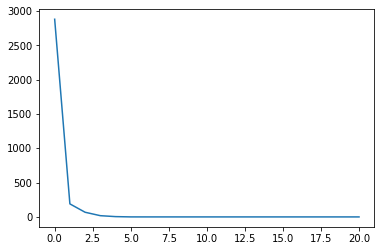

Number of components to retain 99.9% of the variance in the data: 4


In [63]:
#### ANSWER
#Remove the subject column
pks1 = pks1.drop(["subject#"],axis=1)
pks2 = pks2.drop(["subject#"],axis=1)

#Compute the centered maxtrix
m = np.mean(pks1,0)
pks1d = pks1 - np.tile(m,[np.size(pks1,0),1]) # subtract the mean

#Compute covariance matrix
covmat = np.cov(pks1d.T)

# Perform eigendecomposition
[evals, evecs] = la.eig(covmat)
evals = np.real(evals)

print(evals)

#pve = np.cumsum(evals)/np.sum(evals)*100
#plt.figure()
#plt.plot(range(0,np.size(evals)),pve)
#plt.xlabel('number of eigenvectors');
#plt.ylabel('percent variance explained');
#plot the eigenvalues sorted from largest to smallest
plt.plot(evals)
plt.show()

#Number of components to retain 99.9% of the variance in the data
keep = pve<99.9 
print('Number of components to retain 99.9% of the variance in the data:',keep.sum())

### Task 3.2 (1 point)

Your next task is to fit a GLM to predict symptom severity ('total_UPDRS') on the basis of age, sex and the 16 biomedical voice measurements using only the first part of the Parkinson dataset. Don't forget to account for the fact that the symptom severity does not have a zero mean. Print out the regression coefficients and make a plot of them

Design Matrix M1
           age  sex  Jitter(%)  ...      RPDE       DFA       PPE
0     0.805597    0   0.065648  ... -1.213121 -1.478803 -0.650853
3     0.805597    0  -0.156382  ... -0.536766 -1.064411  1.234417
4     0.805597    0  -0.476171  ... -0.689198 -1.299121 -0.284628
5     0.805597    0  -0.446346  ... -0.020849 -1.141758 -0.269455
6     0.805597    0  -0.332017  ... -0.485362 -1.487647 -0.480894
...        ...  ...        ...  ...       ...       ...       ...
5867 -0.426211    0  -0.617010  ... -0.682476 -1.151023 -0.874736
5868 -0.426211    0  -0.618667  ... -0.117034 -1.543938 -1.434521
5871 -0.426211    0  -0.539134  ... -0.154400 -1.243532 -1.020353
5872 -0.426211    0  -0.452974  ... -0.629490 -1.051215 -0.852687
5873 -0.426211    0  -0.565645  ...  0.267407 -1.270344 -0.847556

[4068 rows x 18 columns]
Eegression Coefficients beta1: 
[  0.25986681  -0.16579728  -0.05609594  -0.16816919 -23.64434466
  -0.0627887   23.88471943   0.24966668  -0.21425188 -20.80290528
 

,0,1
0,age,0.259867
1,sex,-0.165797
2,Jitter(%),-0.056096
3,Jitter(Abs),-0.168169
4,Jitter:RAP,-23.644345
5,Jitter:PPQ5,-0.062789
6,Jitter:DDP,23.884719
7,Shimmer,0.249667
8,Shimmer(dB),-0.214252
9,Shimmer:APQ3,-20.802905


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

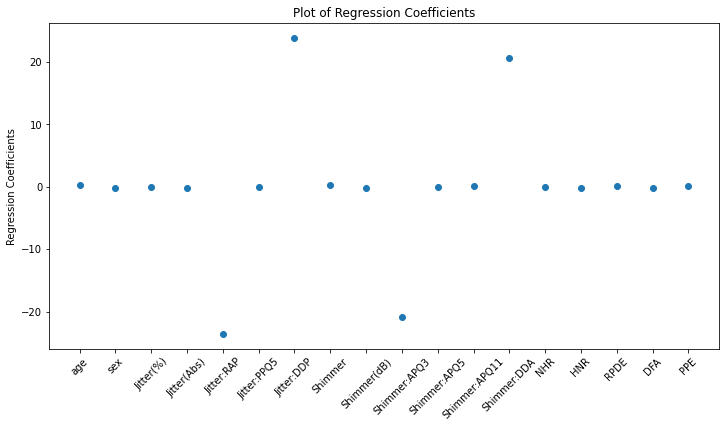

In [64]:
#### ANSWER

# Standardized the dataset except for "sex"
# Retaining the sex columns
s1 = pks1["sex"]
s2 = pks2["sex"]
# Standardized the dataset
pks1 = (pks1 - pks1.mean()) / pks1.std()
pks2 = (pks2 - pks2.mean()) / pks2.std()
# Returning the sex value
pks1["sex"] = s1
pks2["sex"] = s2

# Select 'total_UPDRS' from dataset
y1 = pks1.loc[:,'total_UPDRS']

# Select relevant columns
cols = pks1.drop(['test_time','motor_UPDRS','total_UPDRS'], axis = 1)

# Make the design matrix
M1 = cols
print("Design Matrix M1")
print(M1)

# Calculate beta
beta1 = np.linalg.pinv(M1).dot(y1)
print("Eegression Coefficients beta1: ")
print(beta1)

#### Plotting
betaplot = pd.DataFrame(list(zip(cols.columns, beta1))) 
display(betaplot)
plt.figure(figsize=(12, 6))
plt.scatter(betaplot.iloc[:,0],betaplot.iloc[:,1])
plt.title("Plot of Regression Coefficients")
plt.ylabel('Regression Coefficients')
plt.xticks(rotation=45)

### Task 3.3 (1 point)

Now, evaluate how accurately this model can predict the true symptom scores. To do this compute the correlation between the true and predicted symptom scores as well as the explained variance score. Print these values. 

Hint: the explained variance can be computed as 1-var(y-yhat)/var(y) where y and yhat are the true and predicted labels respectively.

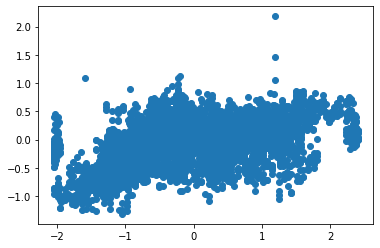

Correlation between the true and predicted symptom scores: 0.42
Explained variance score: 0.17


In [65]:
#### ANSWER

# Calculate your predicted scores
yhat1 = M1.dot(beta1)

# Make a scatter plot (optional)
plt.scatter(y1,yhat1)
plt.show()

# use np.corrcoef()
corr = np.corrcoef(y1,yhat1)
ev = 1-st.variance(y1-yhat1)/st.variance(y1) 


# print out the values
print("Correlation between the true and predicted symptom scores:", round(corr[0,1],2))
print("Explained variance score:", round(ev,2))

### Task 3.4 (1 point)

Now compute the predictions on the second dataset using the coefficients estimated on the first dataset. Compute and print the correlation and explained variance as above

In [66]:
#### ANSWER

y2 = pks2.loc[:,'total_UPDRS']

# Select relevant columns
cols2 = pks2.drop(['test_time','motor_UPDRS','total_UPDRS'], axis = 1)

# Make the design matrix
#M2 = np.zeros((len(cols2),len(cols2.columns)))
M2 = cols2
print("Design Matrix M2")
print(M2)

# Compute the predictions
yhat2 = M2.dot(beta1)

# compute the accuracy
corr2 = np.corrcoef(y2,yhat2)
ev2 = 1-st.variance(y2-yhat2)/st.variance(y2) 

# print out the values
print("Correlation between the true and predicted symptom scores:", round(corr2[0,1],2))
print("Explained variance score:", round(ev2,2))


Design Matrix M2
           age  sex  Jitter(%)  ...      RPDE       DFA       PPE
1     0.839385    0  -0.656587  ... -1.056039 -1.244326 -1.219154
2     0.839385    0  -0.259929  ... -0.784821 -1.539704 -0.101170
10    0.839385    0  -0.294992  ... -0.420083 -0.589847 -0.498556
11    0.839385    0  -0.137206  ... -0.738707 -1.029493 -0.279101
12    0.839385    0  -0.165695  ...  0.246582 -0.660698 -0.104457
...        ...  ...        ...  ...       ...       ...       ...
5863 -0.443442    0  -0.235822  ...  0.518695 -1.363647 -0.095144
5865 -0.443442    0  -0.593034  ... -0.212272 -1.217098 -1.156483
5869 -0.443442    0  -0.713565  ... -0.870788 -1.292083 -0.930345
5870 -0.443442    0  -0.424290  ...  1.003389 -1.410120 -0.062494
5874 -0.443442    0  -0.696033  ...  0.446145 -1.158792 -0.723270

[1807 rows x 18 columns]
Correlation between the true and predicted symptom scores: 0.39
Explained variance score: 0.16


### Task 3.5 (2 points)

Now, we are going to interpret these results. Please answer the following questions:

1. Can you see evidence for overfitting? why or why not?  
2. Which do you think might be the most important explanatory variables ? Explain why you think that

#### ANSWER
1. The correlation between the true and predicted value symptom scores are 0.42 and 0.39 for the training and validating datasets, respectively. These scores are low (not close to 1), so there are errors/residuals between true and predicted values. 

    The explained variance scores are similar between training and validating datasets (0.17 and 0.16, respectively); therefore, a model is not too closely aligned to a limited data points of only training dataset.

    In conclusion, no evidence of overfitting.

2. In this analysis, all the variables except for sex were standardized. 

    The most important explanatory variables (with their regression coefficients)  could be:
    * Jitter:RAP(-23.644345), 
    * Jitter:DDP(23.884719), 
    * Shimmer:APQ3 (-20.802905),
    * Shimmer:DDA (20.634240) 

    because their regression coefficients (after standardization) shows higher absolute values compared to other independent variables. This means that a unit of change (standard deviation) in these four variables generate more effect on the change (standard deviation) of dependent variables (standardized total_UPDRS) than other independent variables.

In [67]:
# Regression coefficients corresponding to 18 variables
betaplot

,0,1
0,age,0.259867
1,sex,-0.165797
2,Jitter(%),-0.056096
3,Jitter(Abs),-0.168169
4,Jitter:RAP,-23.644345
5,Jitter:PPQ5,-0.062789
6,Jitter:DDP,23.884719
7,Shimmer,0.249667
8,Shimmer(dB),-0.214252
9,Shimmer:APQ3,-20.802905


### Task 3.6 (1 point)

Now write a small piece of code to compute the accuracy the other way around (i.e. estimating GLM coefficients using the second dataset, then making predictions on the first dataset). Is there evidence for overfitting in this case? 

Design Matrix M3
           age  sex  Jitter(%)  ...      RPDE       DFA       PPE
1     0.839385    0  -0.656587  ... -1.056039 -1.244326 -1.219154
2     0.839385    0  -0.259929  ... -0.784821 -1.539704 -0.101170
10    0.839385    0  -0.294992  ... -0.420083 -0.589847 -0.498556
11    0.839385    0  -0.137206  ... -0.738707 -1.029493 -0.279101
12    0.839385    0  -0.165695  ...  0.246582 -0.660698 -0.104457
...        ...  ...        ...  ...       ...       ...       ...
5863 -0.443442    0  -0.235822  ...  0.518695 -1.363647 -0.095144
5865 -0.443442    0  -0.593034  ... -0.212272 -1.217098 -1.156483
5869 -0.443442    0  -0.713565  ... -0.870788 -1.292083 -0.930345
5870 -0.443442    0  -0.424290  ...  1.003389 -1.410120 -0.062494
5874 -0.443442    0  -0.696033  ...  0.446145 -1.158792 -0.723270

[1807 rows x 18 columns]
[ 0.22746251 -0.15522457  0.30053728 -0.23380637  5.46229776 -0.15493562
 -5.3976445   0.74545404 -0.1125544  -4.76127955 -0.23469951  0.11982717
  4.24297704 -0.223

,0,1
0,age,0.227463
1,sex,-0.155225
2,Jitter(%),0.300537
3,Jitter(Abs),-0.233806
4,Jitter:RAP,5.462298
5,Jitter:PPQ5,-0.154936
6,Jitter:DDP,-5.397645
7,Shimmer,0.745454
8,Shimmer(dB),-0.112554
9,Shimmer:APQ3,-4.761280


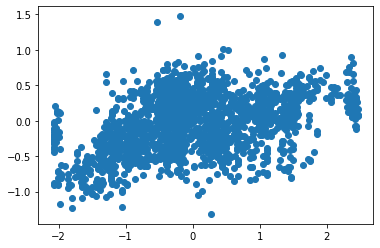

Correlation between the true and predicted symptom scores on same dataset: 0.41
Explained variance score: 0.17
Design Matrix M4
           age  sex  Jitter(%)  ...      RPDE       DFA       PPE
0     0.805597    0   0.065648  ... -1.213121 -1.478803 -0.650853
3     0.805597    0  -0.156382  ... -0.536766 -1.064411  1.234417
4     0.805597    0  -0.476171  ... -0.689198 -1.299121 -0.284628
5     0.805597    0  -0.446346  ... -0.020849 -1.141758 -0.269455
6     0.805597    0  -0.332017  ... -0.485362 -1.487647 -0.480894
...        ...  ...        ...  ...       ...       ...       ...
5867 -0.426211    0  -0.617010  ... -0.682476 -1.151023 -0.874736
5868 -0.426211    0  -0.618667  ... -0.117034 -1.543938 -1.434521
5871 -0.426211    0  -0.539134  ... -0.154400 -1.243532 -1.020353
5872 -0.426211    0  -0.452974  ... -0.629490 -1.051215 -0.852687
5873 -0.426211    0  -0.565645  ...  0.267407 -1.270344 -0.847556

[4068 rows x 18 columns]
Correlation between the predicted symptom scores with 

In [77]:
#### ANSWER

# FINDING THE MODEL USING PART 2 DATA

# Select 'total_UPDRS' from dataset
y3 = pks2.loc[:,'total_UPDRS']

# Select relevant columns
cols3 = pks2.drop(['test_time','motor_UPDRS','total_UPDRS'], axis = 1)

# Make the design matrix
#M3 = np.zeros((len(cols3),len(cols3.columns)))
M3 = cols3
print("Design Matrix M3")
print(M3)


# Calculate beta
beta3 = np.linalg.pinv(M3).dot(y3)
print(beta3)
betaplot3 = pd.DataFrame(list(zip(cols3.columns, beta3))) 
display(betaplot3)

# Evaluate how accurately this model can predict the true symptom scores on same dataset

# Calculate your predicted scores
yhat3 = M3.dot(beta3)

# Make a scatter plot (optional)
plt.scatter(y3,yhat3)
plt.show()

# use np.corrcoef()
corr3 = np.corrcoef(y3,yhat3)
ev3 = 1-st.variance(y3-yhat3)/st.variance(y3) 

# print out the values
print("Correlation between the true and predicted symptom scores on same dataset:", round(corr3[0,1],2))
print("Explained variance score:", round(ev3,2))


# VALIDATING ON PART 1 DATA

y4 = pks1.loc[:,'total_UPDRS']

# Select relevant columns
cols4 = pks1.drop(['test_time','motor_UPDRS','total_UPDRS'], axis = 1)

# Make the design matrix
M4 = np.zeros((len(cols4),len(cols4.columns)))
M4 = cols4
print("Design Matrix M4")
print(M4)

# compute the predictions
yhat4 = M4.dot(beta3)

# use np.corrcoef()
corr4 = np.corrcoef(y4,yhat4)
ev4 = 1-st.variance(y4-yhat4)/st.variance(y4) 


# print out the values
# print out the values
print("Correlation between the predicted symptom scores with true value from the first dataset:", round(corr4[0,1],2))
print("Explained variance score:", round(ev4,2))

#### ANSWER
The correlation between the true and predicted value symptom scores are 0.41 and 0.40 for the training and validating datasets, respectively. These scores are low (not close to 1), so there are errors/residuals between true and predicted values. 

   The explained variance scores are similar between training and validating datasets (0.17 and 0.16, respectively); therefore, a model is not too closely aligned to a limited data points of only training dataset.

   In conclusion, also no evidence of overfitting in this case.